In [17]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load observations dataset 
df_observations = pd.read_csv('observations.csv')

# Load species info dataset
df_species = pd.read_csv('species_info.csv')

# Merge datasets on scientific name
df_merged = pd.merge(df_observations, df_species, on='scientific_name')

print(df_merged.head())
print(df_merged.info())
print(df_merged.describe())
print(df_merged.isnull().sum())
print(df_merged.columns.tolist())



#print different conservation statuses
print("\n" + "="*70 + "\n")
print(df_merged['conservation_status'].value_counts())

print("\n" + "="*70 + "\n")
print(df_merged['category'].value_counts())


# # Explore each dataset
# print(df_observations.head())
# print("\n" + "="*70 + "\n")
# print(df_species.head())

            scientific_name                            park_name  \
0        Vicia benghalensis  Great Smoky Mountains National Park   
1            Neovison vison  Great Smoky Mountains National Park   
2         Prunus subcordata               Yosemite National Park   
3      Abutilon theophrasti                  Bryce National Park   
4  Githopsis specularioides  Great Smoky Mountains National Park   

   observations        category                        common_names  \
0            68  Vascular Plant  Purple Vetch, Reddish Tufted Vetch   
1            77          Mammal                       American Mink   
2           138  Vascular Plant                        Klamath Plum   
3            84  Vascular Plant                          Velvetleaf   
4            85  Vascular Plant                      Common Bluecup   

  conservation_status  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN  
<class 'pandas.core.

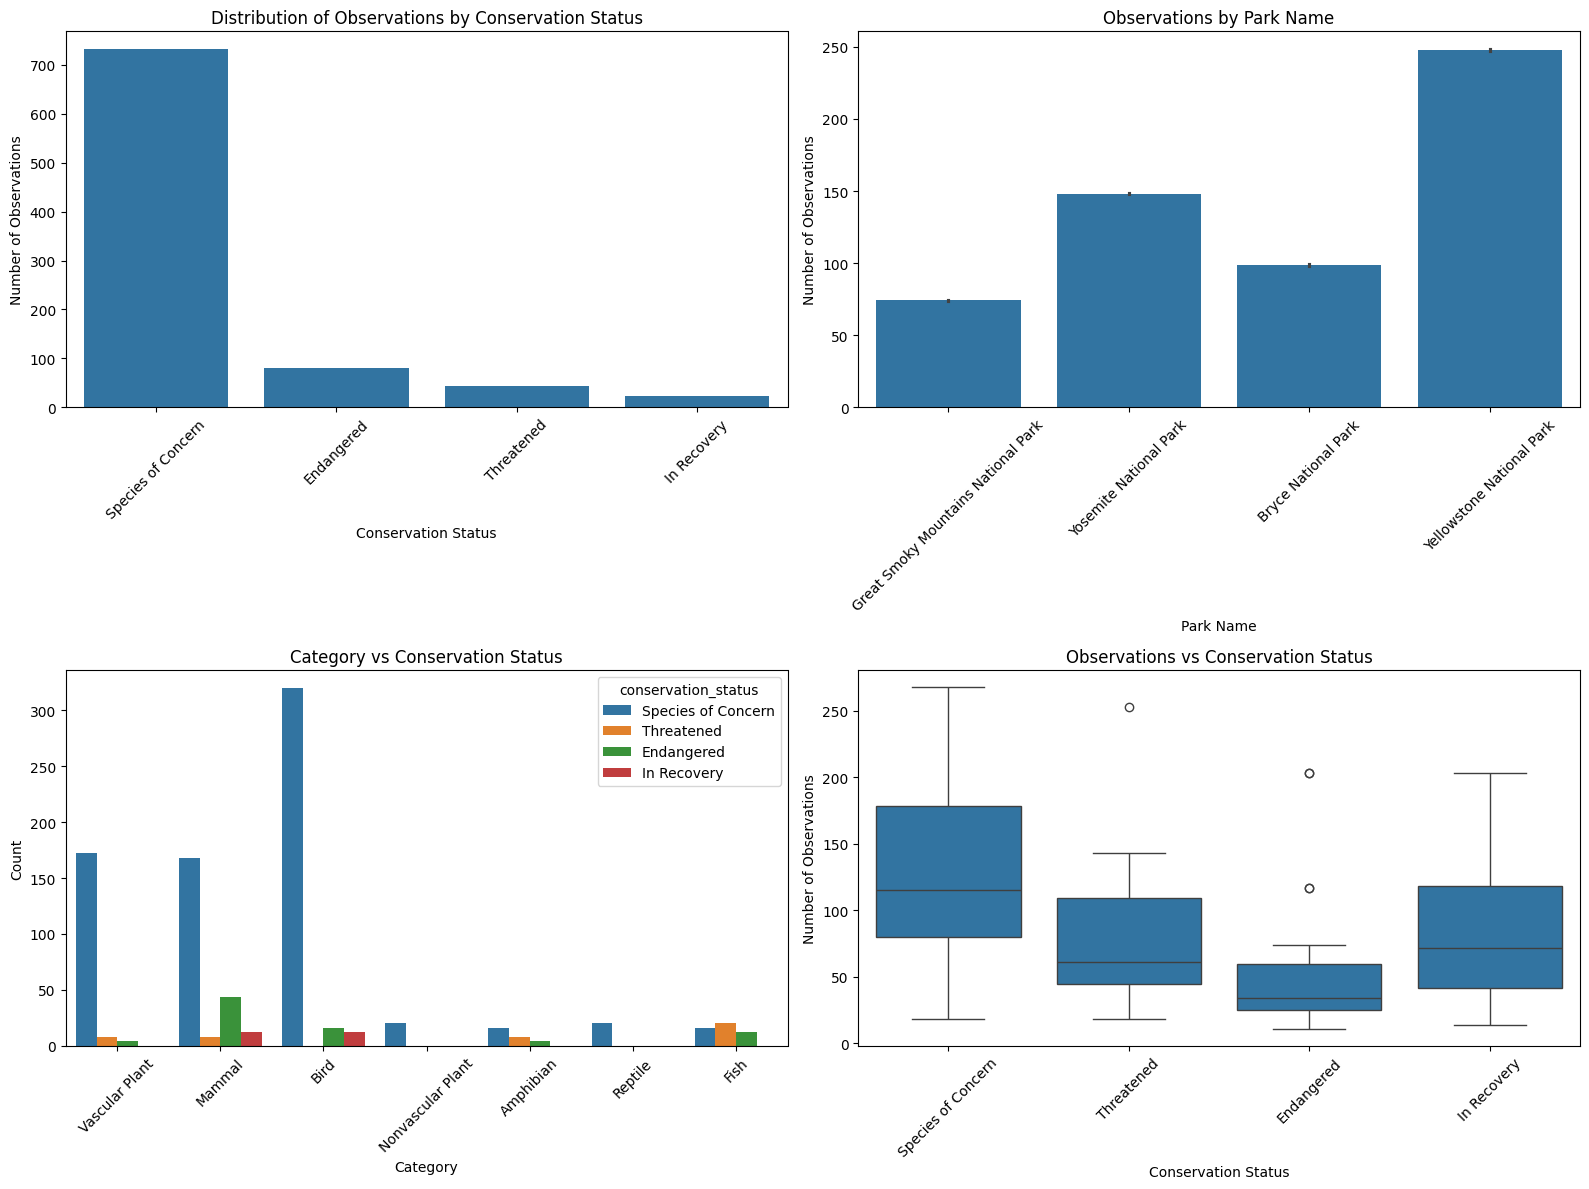



Top 5 Categories with Highest Number of Endangered Species:
category
Mammal            44
Bird              16
Fish              12
Amphibian          4
Vascular Plant     4
Name: count, dtype: int64


In [23]:
# Create a figure with 4 subplots (2x2 grid)
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Distribution of observations by conservation status
sns.countplot(data=df_merged, x='conservation_status', 
              order=df_merged['conservation_status'].value_counts().index, 
              ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Observations by Conservation Status')
axes[0, 0].set_xlabel('Conservation Status')
axes[0, 0].set_ylabel('Number of Observations')
axes[0, 0].tick_params(axis='x', rotation=45)

# Plot 2: Observations by park name
sns.barplot(data=df_merged, x='park_name', y='observations', ax=axes[0, 1])
axes[0, 1].set_title('Observations by Park Name')
axes[0, 1].set_xlabel('Park Name')
axes[0, 1].set_ylabel('Number of Observations')
axes[0, 1].tick_params(axis='x', rotation=45)

# Plot 3: Category vs Conservation Status
sns.countplot(data=df_merged, x='category', hue='conservation_status', ax=axes[1, 0])
axes[1, 0].set_title('Category vs Conservation Status')
axes[1, 0].set_xlabel('Category')
axes[1, 0].set_ylabel('Count')
axes[1, 0].tick_params(axis='x', rotation=45)

# Plot 4: Observations vs conservation status (boxplot)
sns.boxplot(data=df_merged, x='conservation_status', y='observations', ax=axes[1, 1])
axes[1, 1].set_title('Observations vs Conservation Status')
axes[1, 1].set_xlabel('Conservation Status')
axes[1, 1].set_ylabel('Number of Observations')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Top 5 categories with highest number of endangered species
endangered_counts = df_merged[df_merged['conservation_status'] == 'Endangered']['category'].value_counts().head(5)
print("\n" + "="*70 + "\n")
print("Top 5 Categories with Highest Number of Endangered Species:")
print(endangered_counts)# Regression analysis to predict observations based on conservation status
X = df_reg.drop('observations', axis=1)
y = df_reg['observations']
